In [73]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set_theme(color_codes=True)

In [74]:
df=pd.read_csv("realtor-data.csv")
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [75]:
df.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

In [76]:
df.shape

(100000, 10)

In [77]:
#check the number of unique value for object data type
df.select_dtypes(include="object").nunique()

status               2
city               525
state               12
prev_sold_date    3604
dtype: int64

In [78]:
df.isna().sum()

status                0
bed               24950
bath              24888
acre_lot          14013
city                 52
state                 0
zip_code            195
house_size        24918
prev_sold_date    71255
price                 0
dtype: int64

In [79]:
#drop column pre_sold_data
df.drop(columns='prev_sold_date', inplace=True)
df.drop(columns='city', inplace=True)
df.drop(columns='zip_code', inplace=True)
df.head()

,status,bed,bath,acre_lot,state,house_size,price
0,for_sale,3.0,2.0,0.12,Puerto Rico,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Puerto Rico,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Puerto Rico,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Puerto Rico,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Puerto Rico,NaN,65000.0


## EDA

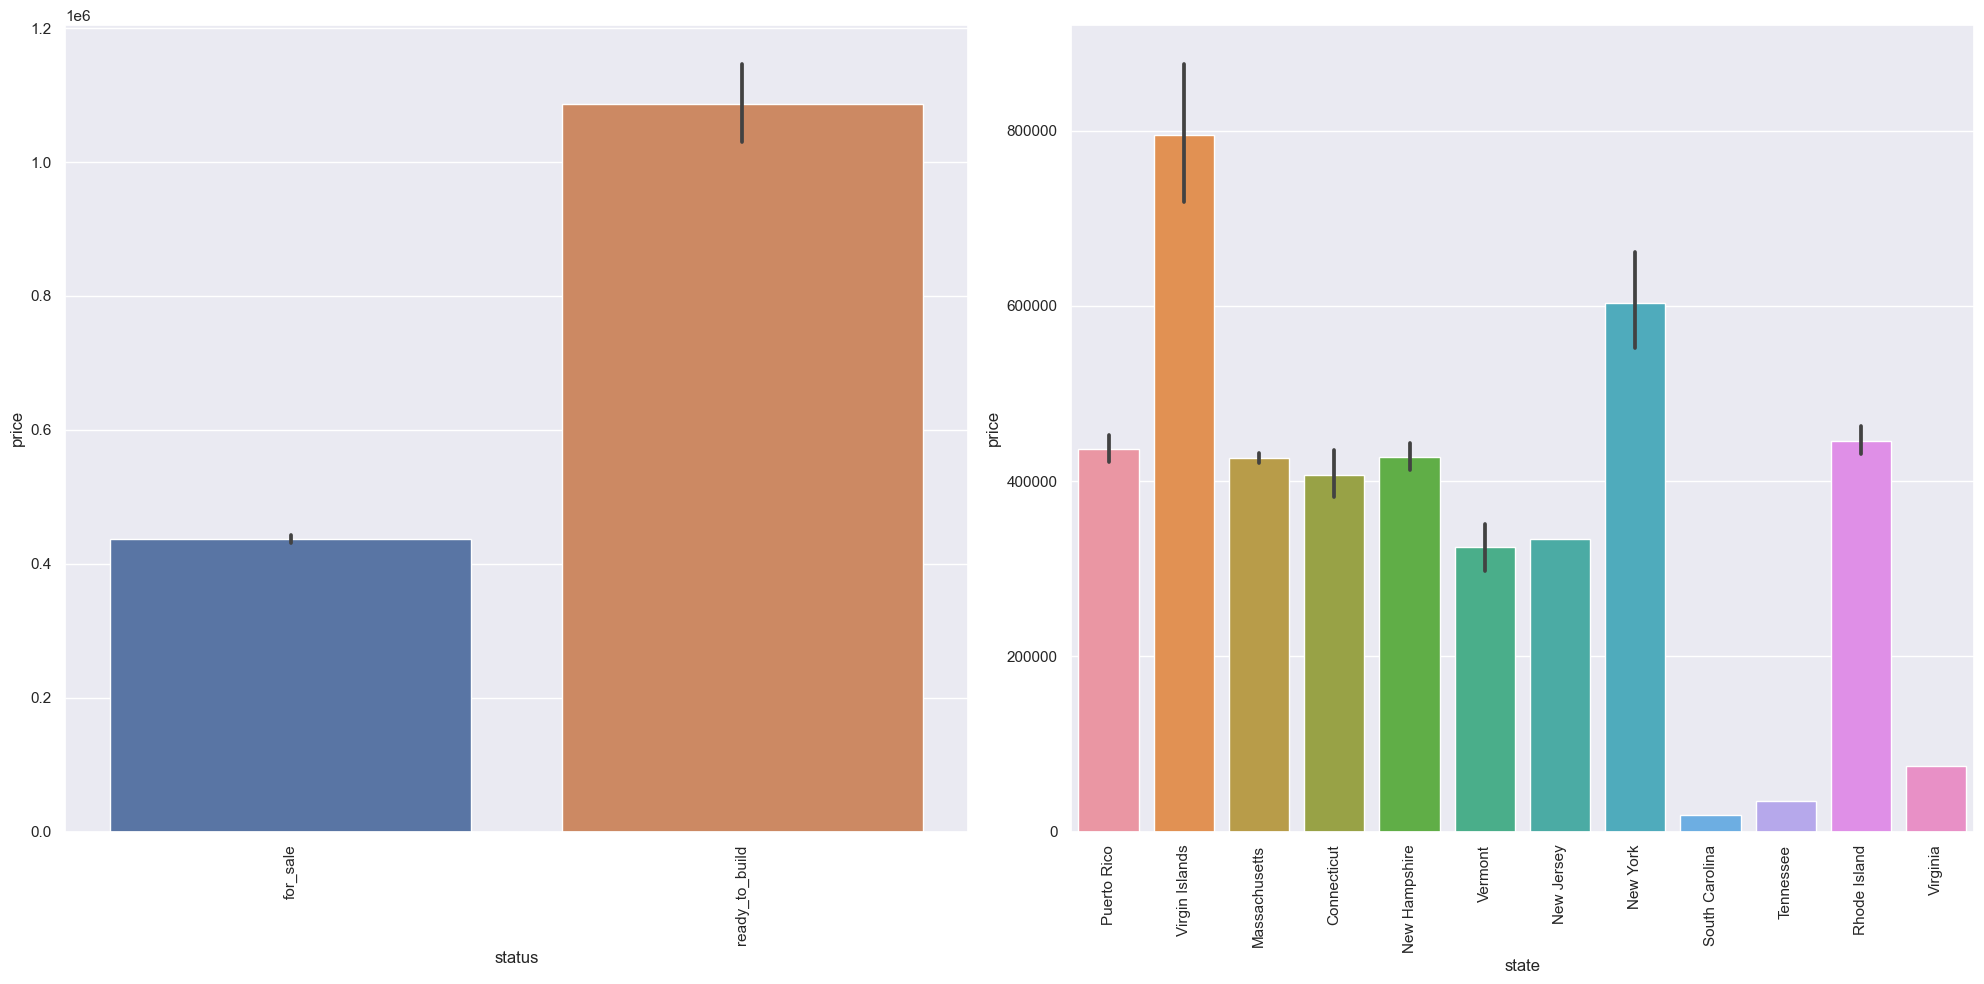

In [58]:
cats_var=['status','state']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs= axs.flatten()

for i, var in enumerate(cats_var):
    sbn.barplot(x=var,y='price', data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

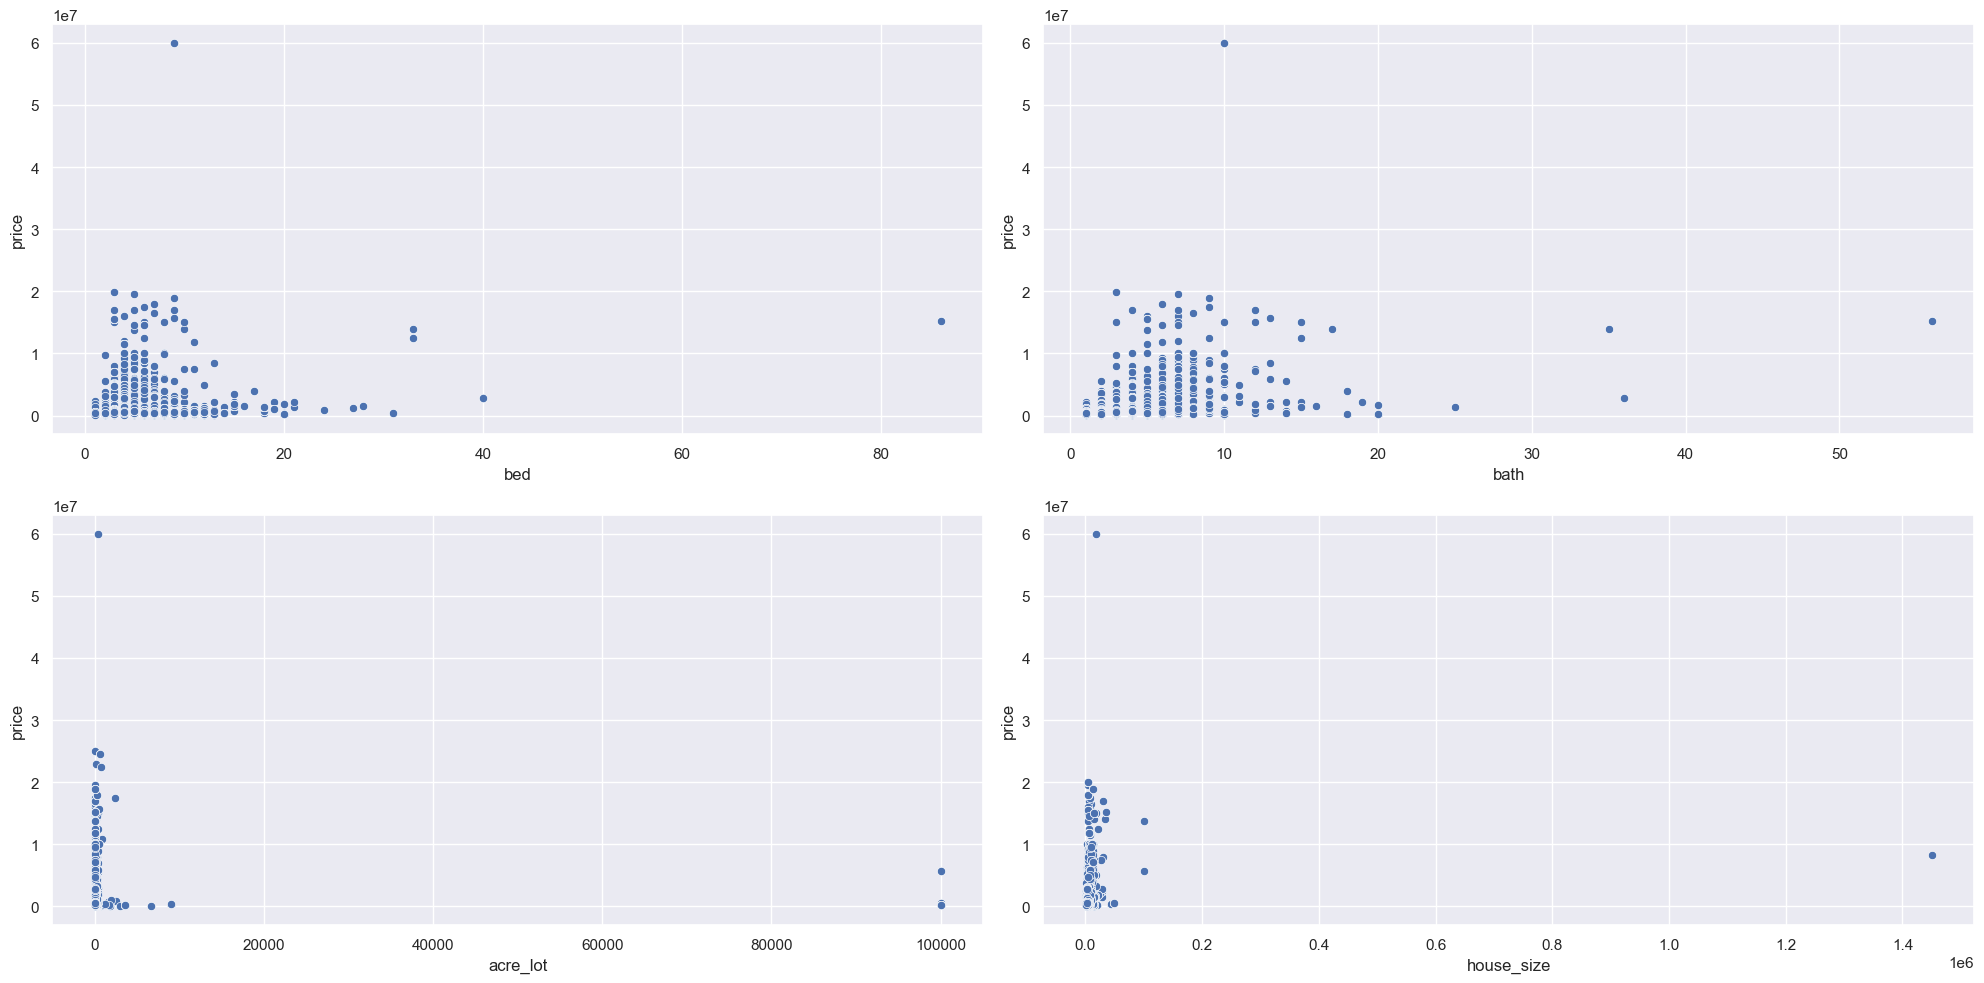

In [47]:
num_vars=['bed','bath','acre_lot','house_size']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs= axs.flatten()

for i, var in enumerate(num_vars):
    sbn.scatterplot(x=var,y='price', data=df,ax=axs[i])

fig.tight_layout()
plt.show()

In [80]:
#fill missing values
df['bed'].fillna(df['bed'].median(), inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['acre_lot'].fillna(df['acre_lot'].median(), inplace=True)
df['house_size'].fillna(df['house_size'].median(), inplace=True)
df.isna().sum()

status        0
bed           0
bath          0
acre_lot      0
state         0
house_size    0
price         0
dtype: int64

In [81]:
#label encoding
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col]=label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

status: [0 1]
state: [ 5 10  1  0  2  9  3  4  7  8  6 11]


In [82]:
df.head()

,status,bed,bath,acre_lot,state,house_size,price
0,0,3.0,2.0,0.12,5,920.0,105000.0
1,0,4.0,2.0,0.08,5,1527.0,80000.0
2,0,2.0,1.0,0.15,5,748.0,67000.0
3,0,4.0,2.0,0.10,5,1800.0,145000.0
4,0,6.0,2.0,0.05,5,1728.0,65000.0


<Axes: >

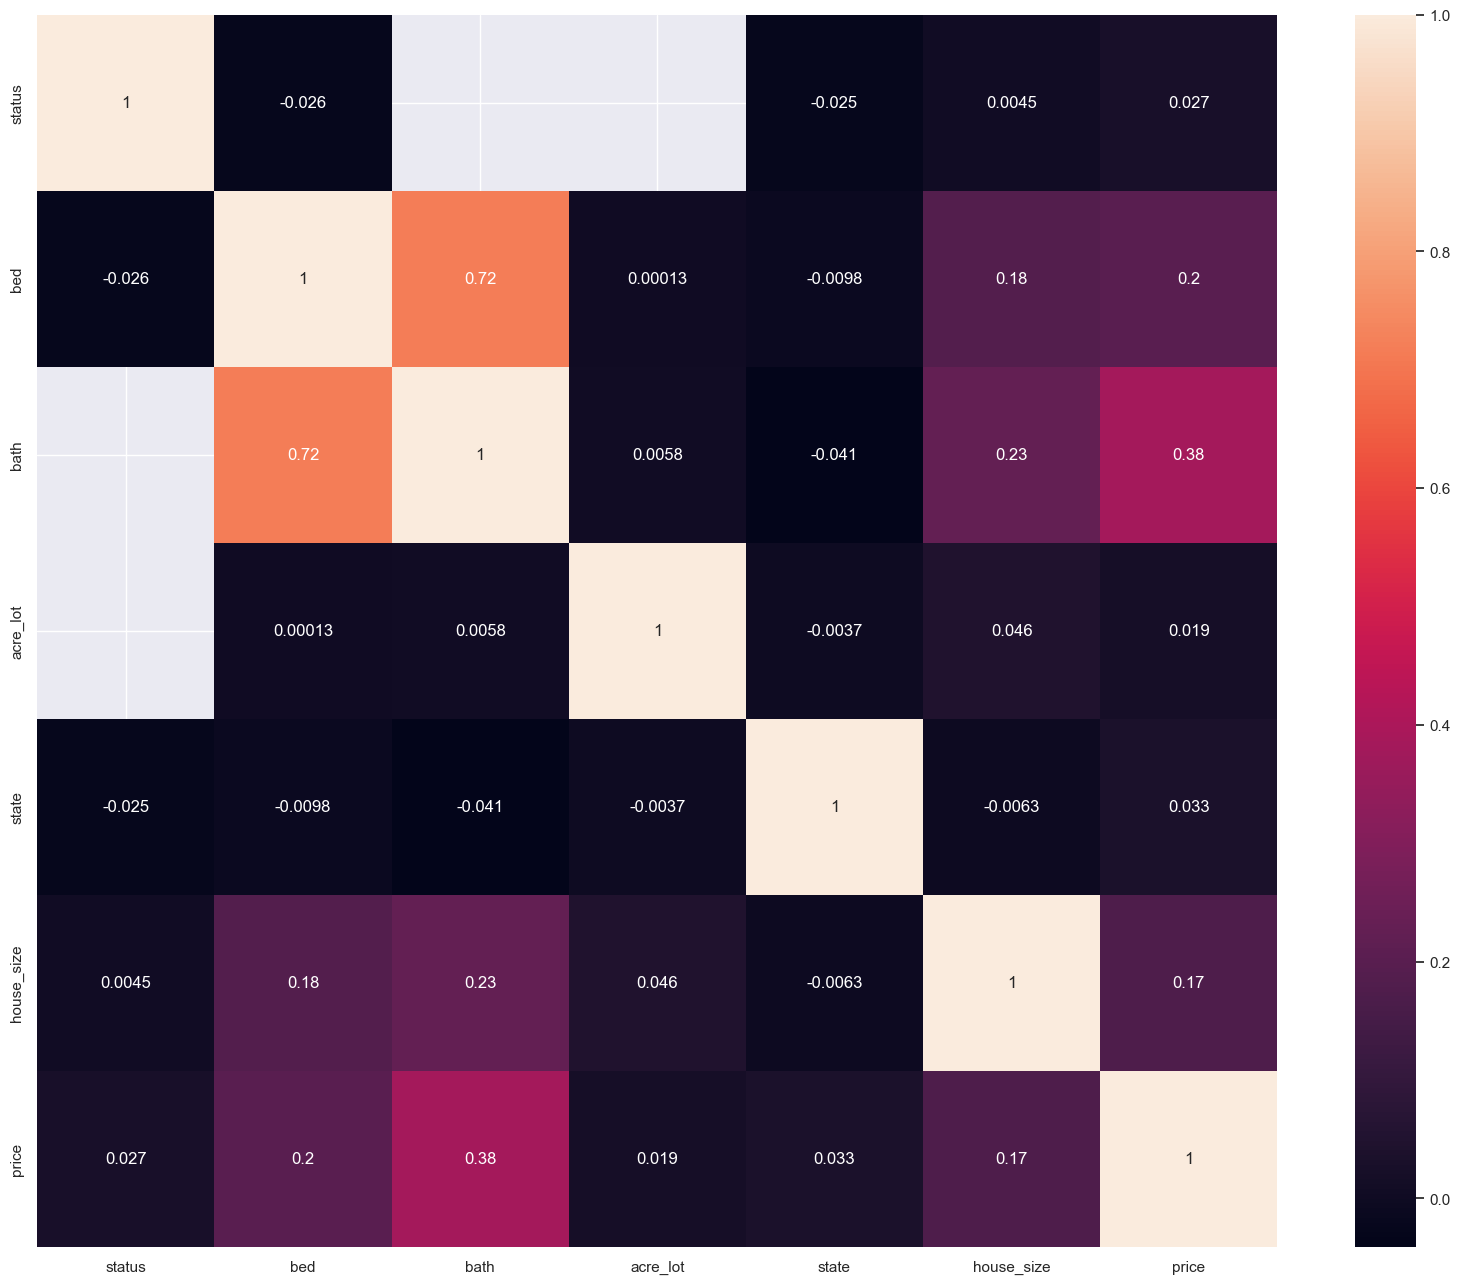

In [69]:
#corilation heatmap
plt.figure(figsize=(20, 16))
sbn.heatmap(df.corr(method='pearson'), fmt='.2g',annot=True)

In [70]:
df.drop(columns='bath', inplace=True)

## Train Test Split

In [111]:
x=df.drop('price', axis=1)
y=df['price']

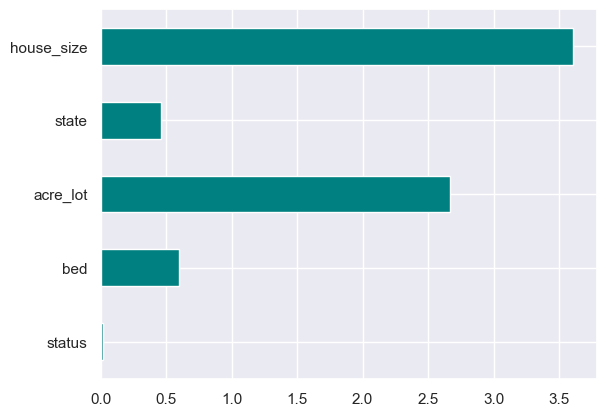

In [86]:
# feature importance
from sklearn.feature_selection import VarianceThreshold,  mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances, x.columns[0:len(x.columns)] )
feat_importances.plot(kind="barh", color="teal")
plt.show()

In [112]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn .metrics import accuracy_score 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

## AdaBoost Regressor

In [113]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
#adaboost regresor object
ada=AdaBoostRegressor()
# define the hyper parameter grid
param_grid={'n_estimators':[50,100,150],
           'learning_rate':[0.01,0.1,1]}
#grid search  object
grid= GridSearchCV(ada,param_grid,cv=5, scoring='neg_mean_absolute_error')

grid.fit(X_train,y_train)

print("best hyperparameters:", grid.best_params_)

best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}


In [114]:
print("best score is{}".format(grid.best_score_))

best score is-276128.0988479083


In [115]:
ada=AdaBoostRegressor(n_estimators= 50,learning_rate= 0.01,random_state=0)
ada.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.01, random_state=0)

In [117]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

y_pred=ada.predict(X_test)
r2=metrics.r2_score(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=math.sqrt(mse)


print('R2 Score is {}'.format(r2))
print('MSE Score is {}'.format(mse))
print('RMSE Score is {}'.format(rmse))

R2 Score is 0.5541459917648659
MSE Score is 630244257070.033
RMSE Score is 793879.2458995467
